# Analise de nubes automatico


# Sobre este ejercicio
Este ejercicio es sobre el tema de ajuste (fitting) y es parte del examen parcial III (contribuje al puntaje). Es para evitar hacer el examen en Viernes 22.10.2021 demasiado grande. Ustedes tienen tiempo hasta fin del semana para terminarlo y enviar a mi correo: michal.hemmerling@udea.edu.co

# Objetivo de este ejercicio
Aprender automatizar procesos de analisis de datos usando ajuste.

La tabla de Pandas contiene 9 columnas con 9 secciónes transversales de nubes de atomos. La idea es crear un loop que hace fitting (ajuste) cada de este secciónes transversales con funcion gaussiana, y guarda resultados en otra tabla de Pandas en forma: {nombre de nube: temp}. 

In [9]:
import pandas as pd
import numpy as np
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt
df_cloud_temp = pd.DataFrame()

In [10]:
df=pd.read_csv('clouds_cross_sections.csv')
df.head()

,Unnamed: 0,31m56s.png,10m04s.png,07m36s.png,38m55s.png,03m10s.png,14m04s.png,33m28s.png,06m47s.png,08m25s.png
0,0,-0.0,5.439984e+10,-0.0,1.351954e+10,-0.000000e+00,-0.000000e+00,5.439984e+10,1.096736e+11,-0.0
1,1,-0.0,5.439984e+10,-0.0,1.351954e+10,-0.000000e+00,-0.000000e+00,5.439984e+10,8.192574e+10,-0.0
2,2,-0.0,4.071904e+10,-0.0,1.351954e+10,-0.000000e+00,-0.000000e+00,5.439984e+10,8.192574e+10,-0.0
3,3,-0.0,5.439984e+10,-0.0,1.351954e+10,-0.000000e+00,2.709241e+10,5.439984e+10,5.439984e+10,-0.0
4,4,-0.0,5.439984e+10,-0.0,-0.000000e+00,2.709241e+10,4.071904e+10,-0.000000e+00,4.071904e+10,-0.0


# Crear una funcion gaussiana para ajuste

In [11]:
# crear una funcion gaussiana que va a ser un argumento para curve_fit.
# esta funcion recibe cuatro argumentos (x,amp,sigma,cm) y vuelve uno: gaussian

def fittingGauss1D(x,amp,sigma,cm): 
    return amp*np.exp(-(x-cm)**2.0 / (2.0*(sigma**2.0)))

# Crear una funcion que hace ajuste 

In [12]:
# funcion recibe dos argumentos (x,y) que son 
# x = primera columna de tabla (numero del pixel)
# y = n-ta columna de tabla (valor de la amplituda de la nube)
# la function vuelve valores de ajuste: amp,sigma,cm

def calculate_coefficients(x,y):
    p0=[np.max(y),100,800]
    coe, matcov = curve_fit(fittingGauss1D, x, y, p0, method='lm')
    amp=coe[0]
    sigma=coe[1]
    cm=coe[2]
    return amp,sigma,cm


# Funcion "temperature" ya esta lista

In [13]:
# esta funcion esta lista
# recibe valor de ajuste sigma
# vuelve valor de temperatura [K]

def temperature(sigma):
    hbar = 6.626e-34/(2.0*np.pi)
    pixelsize=1.7e-6
    kB=1.38e-23
    TOF=30.0e-3
    m=1.44e-25
    sigma_in_pixels=sigma*pixelsize
    temp = ((sigma_in_pixels)**2.0*m)/(kB*TOF**2.0)
    return temp

# Crear una loop principal que llama otras funciones

In [14]:
df_new=[] #Primero creo las listas vacías para el nombre de las nubes y la temperatura
T=[]
for i in range(len(df.columns)-1):
    x=df[df.columns[0]].to_numpy()
    y=df[df.columns[i+1]].to_numpy()
    coef = calculate_coefficients(x, y)  #Aquí hallo los 3 coeficiente (amp, sigma y cm), sigma está en la segunda posición
    T.append(temperature(coef[1]))  #Agrego los valores de la nube y la temperatura
    df_new.append(df.columns[i+1])
    
df_cloud_temp=pd.DataFrame(T, columns=['Temperatura']) #Convierto las listas en dataframe
df_new=pd.DataFrame(df_new, columns=['Nube'])
df_cloud_temp = pd.concat([df_new, df_cloud_temp], axis=1) #Uno los dos dataframe


In [15]:
df_cloud_temp

,Nube,Temperatura
0,31m56s.png,6.175614e-07
1,10m04s.png,6.372124e-07
2,07m36s.png,6.083121e-07
3,38m55s.png,3.379777e-07
4,03m10s.png,5.051674e-07
5,14m04s.png,2.680948e-07
6,33m28s.png,6.229490e-07
7,06m47s.png,7.474367e-07
8,08m25s.png,6.938472e-07


Ahora voy a graficar la función x vs fittingGaussian1D, ingresando los 'x' o pixeles, y los coeficientes encontrados con la función calculate_coefficients para verificar que dan los mismos valores de la tabla pero ajustados

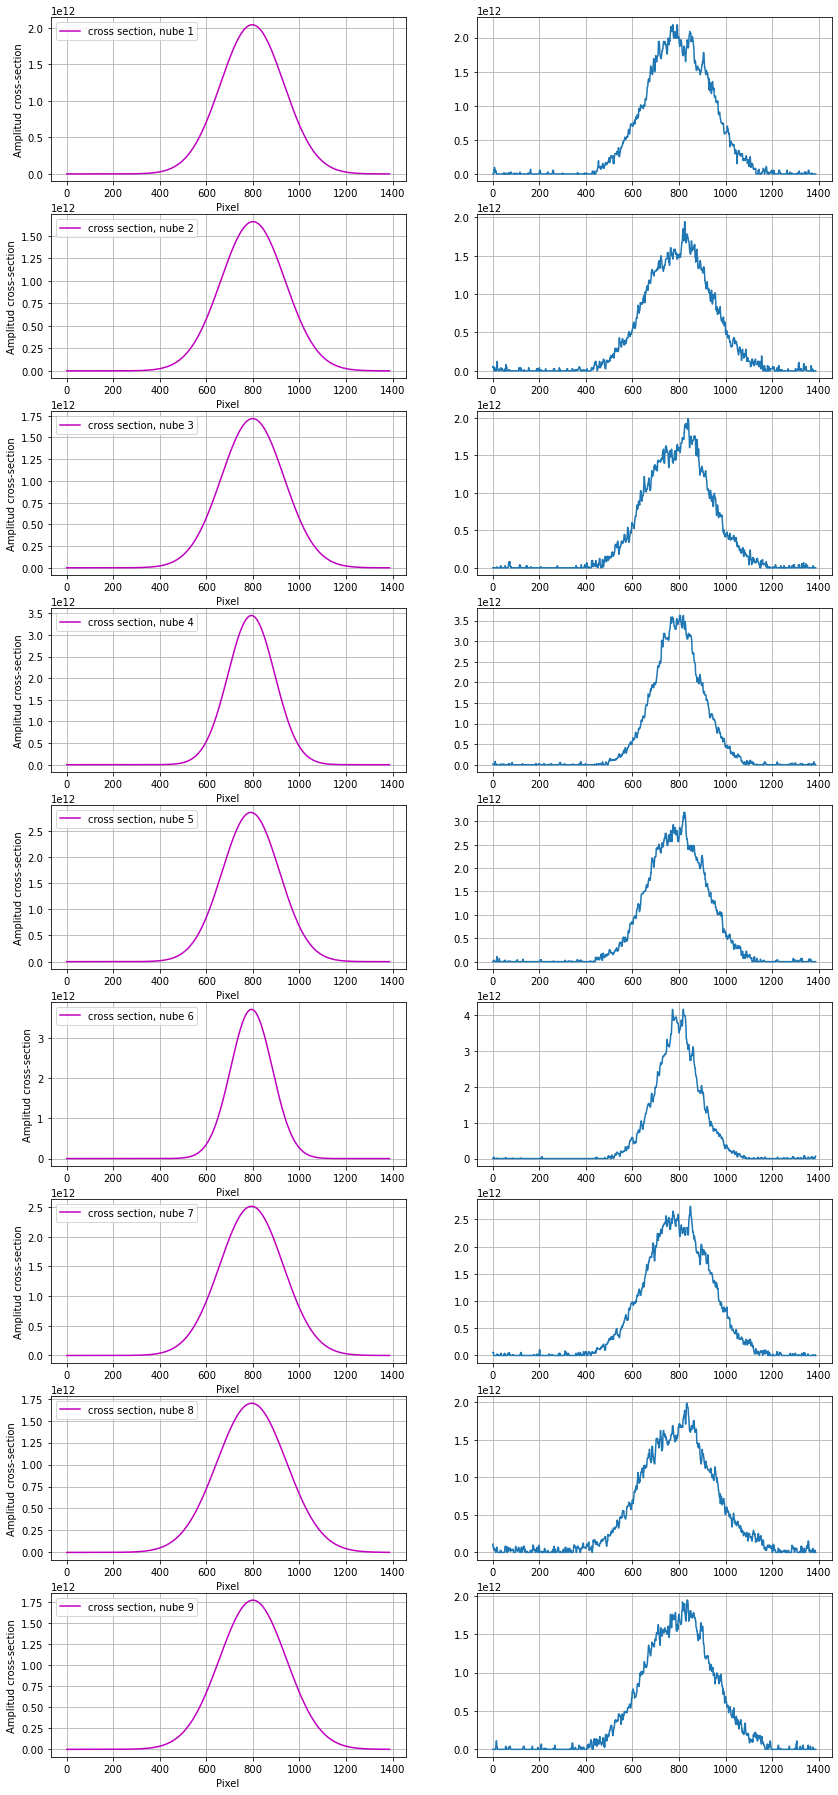

In [16]:
fig, g = plt.subplots(9,2, figsize=(14,32))

for i in range(len(df.columns)-1):
    x=df[df.columns[0]].to_numpy() 
    y=df[df.columns[i+1]].to_numpy() 
    coef = calculate_coefficients(x, y) 
    gausfit=fittingGauss1D(x, coef[0], coef[1], coef[2]) 
    g[i,0].plot(x, gausfit, 'm', label='cross section, nube {}'.format(i+1))
    g[i,1].plot(x, y)
    g[i,0].set_xlabel('Pixel')
    g[i,0].set_ylabel('Amplitud cross-section')
    g[i,0].legend()
    g[i,0].grid()
    g[i,1].grid()    

Las gráficas ajustadas son muy parecidas a las gráficas con los datos datos, así que de esta forma puedo comprobar que los coeficientes amp, sigma y cm son correctos y que la temperatura de cada nube es correcta